In [1]:
#Importing the dependencies
import pandas as pd
import sklearn
import numpy as np

In [2]:
#load data
df = pd.read_csv("hepatitis.csv")


In [3]:
df.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,32.059452,female,no,yes,yes,yes,yes,yes,no,no,no,no,no,1.000000,48.365665,51.718598,4.182311,74.038508,no,LIVE
1,41.229532,female,no,no,no,no,no,yes,no,no,no,no,no,1.146760,63.522251,29.216549,4.030845,25.462303,no,LIVE
2,62.133896,female,yes,no,no,no,no,yes,no,no,no,no,no,1.000000,44.055037,42.183894,4.865354,36.232554,no,LIVE
3,48.209988,female,yes,no,yes,no,no,yes,no,yes,yes,no,no,0.669207,131.126032,50.817332,3.902101,42.755563,yes,DIE
4,32.699629,female,yes,no,yes,yes,yes,no,yes,no,yes,no,no,1.000000,123.179908,20.318702,4.075779,42.079171,no,LIVE


In [4]:
X= df.drop("Class",axis = 1)
y= df['Class']

In [5]:
X.columns

Index(['AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
       'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES',
       'VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME',
       'HISTOLOGY'],
      dtype='object')

In [6]:
#reorganizing DF so it is easier to hot encode and standardize
X= X[['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA',
       'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES',
       'VARICES','HISTOLOGY','AGE',  'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']]

X.head()

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME
0,female,no,yes,yes,yes,yes,yes,no,no,no,no,no,no,32.059452,1.000000,48.365665,51.718598,4.182311,74.038508
1,female,no,no,no,no,no,yes,no,no,no,no,no,no,41.229532,1.146760,63.522251,29.216549,4.030845,25.462303
2,female,yes,no,no,no,no,yes,no,no,no,no,no,no,62.133896,1.000000,44.055037,42.183894,4.865354,36.232554
3,female,yes,no,yes,no,no,yes,no,yes,yes,no,no,yes,48.209988,0.669207,131.126032,50.817332,3.902101,42.755563
4,female,yes,no,yes,yes,yes,no,yes,no,yes,no,no,no,32.699629,1.000000,123.179908,20.318702,4.075779,42.079171


## splitting df into train/ test

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)

In [8]:
# Columns
# 0-12) are categorical need label encoder and hot encode
#13-18) are continuous and need to be standardized
# labeling and hot encoding/ standardizing x variables
# X.iloc[:,0:12]

from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler

/Users/linh/anaconda3/envs/PythonData/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


##  label&hot encode X

In [9]:
X_train[0:10]

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME
518899,male,no,no,no,no,no,yes,no,no,no,no,no,no,38.817206,0.697451,46.313737,32.509185,3.997252,61.439924
150313,male,yes,yes,yes,no,no,yes,no,no,no,no,no,no,23.776826,1.250972,67.843346,74.549884,4.362716,56.370627
871990,female,no,yes,yes,yes,no,no,yes,yes,yes,no,yes,no,54.523353,1.000000,45.072934,53.183951,3.011408,35.844390
317800,female,no,no,yes,yes,no,yes,no,no,no,no,no,no,21.105156,0.535908,85.797477,71.722201,3.528649,9.416374
834382,female,no,no,no,no,no,no,yes,no,no,no,no,no,22.797285,1.389383,82.663802,248.556647,4.193652,49.126167
545980,female,yes,no,yes,yes,no,yes,no,no,no,no,no,no,66.043741,1.513472,40.341780,303.280167,2.557795,43.606474
98923,female,no,no,yes,no,no,yes,yes,no,yes,no,no,no,73.350358,0.767120,127.627229,15.099756,3.520455,33.199018
739829,female,yes,no,yes,yes,no,yes,yes,no,yes,no,no,yes,30.625125,0.481345,71.185156,63.253972,4.555288,51.151627
373122,female,yes,no,no,no,no,yes,no,yes,no,no,no,no,33.990379,0.846372,88.019509,99.969407,4.041717,37.339215
947646,female,no,yes,no,no,no,yes,no,yes,no,no,no,yes,34.068012,1.099358,208.669837,35.944007,3.980853,75.841313


In [10]:
#split columns with yes/no into categorical variable and numerical columns as a continuous variable 
#in order to apply label encoder and scale standardization

X_train_cat = X_train.iloc[:,0:13]
X_train_cont = X_train.iloc[:,13:19]
X_test_cat = X_test.iloc[:,0:13]
X_test_cont = X_test.iloc[:,13:19]
# X_train.iloc[:,13:19]

In [11]:
from collections import defaultdict
d= defaultdict(LabelEncoder)
X_train_cat = X_train_cat.apply((lambda x:d[x.name].fit_transform(x)))
X_test_cat = X_test_cat.apply((lambda x:d[x.name].transform(x)))
# X_train_cat = to_categorical(X_train_cat)
# X_test_cat = to_categorical(X_test_cat)

# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

In [12]:
X_train_cat.values

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0]])

## standard scaling continuous X

In [13]:
X_scaler = StandardScaler()
X_scaler.fit(X_train_cont)
X_train_cont= X_scaler.transform(X_train_cont)
X_test_cont= X_scaler.transform(X_test_cont)

In [14]:
print(f"X_train_cat shape:{X_train_cat.shape}")
print(f"X_test_cat shape{X_test_cat.shape}")
print(f"X_train_cont shape{X_train_cont.shape}")
print(f"X_test_cont shape{X_test_cont.shape}")

X_train_cat shape:(750000, 13)
X_test_cat shape(250000, 13)
X_train_cont shape(750000, 6)
X_test_cont shape(250000, 6)


In [15]:
#combining categorical and continuous columns back together in order to train

X_train = np.concatenate((X_train_cat,X_train_cont), axis =1)
X_test= np.concatenate((X_test_cat,X_test_cont), axis =1)


In [16]:
X_train.shape

(750000, 19)

## label encoding and hot encoding y

In [17]:
#massaging y variable
#label encoding y variable for linear regression
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


#hot encoding y variable since this will give a new shape can be used for neural net
one_hot_y_train = to_categorical(encoded_y_train)
one_hot_y_test = to_categorical(encoded_y_test)
one_hot_y_train.shape

(750000, 2)

In [18]:
encoded_y_train.shape

(750000,)

In [20]:
from sklearn.linear_model import LinearRegression
reg_scaled= LinearRegression().fit(X_train,encoded_y_train)


In [21]:
reg_scaled.score(X_train,encoded_y_train)


0.4837368586148285

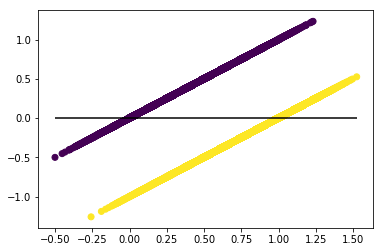

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt 
prediction = reg_scaled.predict(X_test)
plt.scatter(prediction,prediction-encoded_y_test, c = encoded_y_test)
plt.hlines(y=0, xmin=prediction.min(), xmax=prediction.max())
plt.show()